# FragMap_CNN Tutorial

###TODO:
Need to prepare a simple tutorial markdown(.md), where we simply demonstrate what is being done here, including all functionalities, visualizations etc. Unit tests have perfect examples. The best way to do this would be using .ipynb and save it as .md file

## Objective:
Demonstrate functionalities and visualizations using `unit/` directory, which contains python unit tests.

### Main Requirements:
- `pytorch` neural net learning framework
- `torchproteinlibrary` lib for handling 3D protein data
- `pyvista` for simple unit tests

In [1]:
import os
import sys
import torch.nn as nn
import torch.nn.functional as F
import torch
import numpy as np
import pyvista as pv

### Files

In [2]:
!ls unit

augment.py  cnn.py  mapIO.py  rot.py  target.py  util.py  volume.py


### Step 0: Build the CNN

`src/cnn.py` is imported as:
```python
from src.cnn import CnnModel, count_parameter
```
This code builds the CNN model using pytorch. 

Structure:
- 4 convolutional layers
- Input -> output halved each convolution
- E.g. 48 in -> 24 out, 24 in -> 12 out... etc

Initialized parameters:

- Correct the dimensions of 3D input (pad rectangular boxes to cubic boxes)
- 3D CNN input/output channels, kernal size, and padding; per each layer.


### cnn.py example:

In [3]:
from src.cnn import CnnModel, count_parameters

#### Initialize 11 input channels and depth, width, height

In [4]:
c, d, h, w = 11, 20, 20, 20
torch.manual_seed(3000)

#### Generate some random data

In [7]:
data = torch.randn(1, c, d, h, w)   

print(data.size())

torch.Size([1, 11, 20, 20, 20])


#### Build model using random data

In [8]:
#invoke the model
model = CnnModel()
output = model(data)

#compare input and output shapes
print("11 input channels VS 4 output channels")
print("Input dimension -->", data.size())
print("Output dimension -->",output.size())

11 input channels VS 4 output channels
Input dimension --> torch.Size([1, 11, 20, 20, 20])
Output dimension --> torch.Size([1, 6, 20, 20, 20])


#### NOTE: this is how pytorch will check the parameter count
- The values pertain to multiplicative sums of 3D kernal and layer dimensions

In [9]:
n_params = [p.numel() for p in model.parameters() if p.requires_grad]
print('total =', n_params)

total = [14256, 48, 31104, 24, 24, 24, 7776, 12, 12, 12, 1944, 6, 6, 6]


#### Notice: Pytorch default behavior
- 48 output channels from Conv layer 1
- Then 3 dimensions * 24 output chanels for Conv layer 2
- The pattern continues for the following Conv layers, but only Conv layer 1 does not get multiplied by dimension.

Number of parameters in model 55254
Number of parameteres estimated 55254


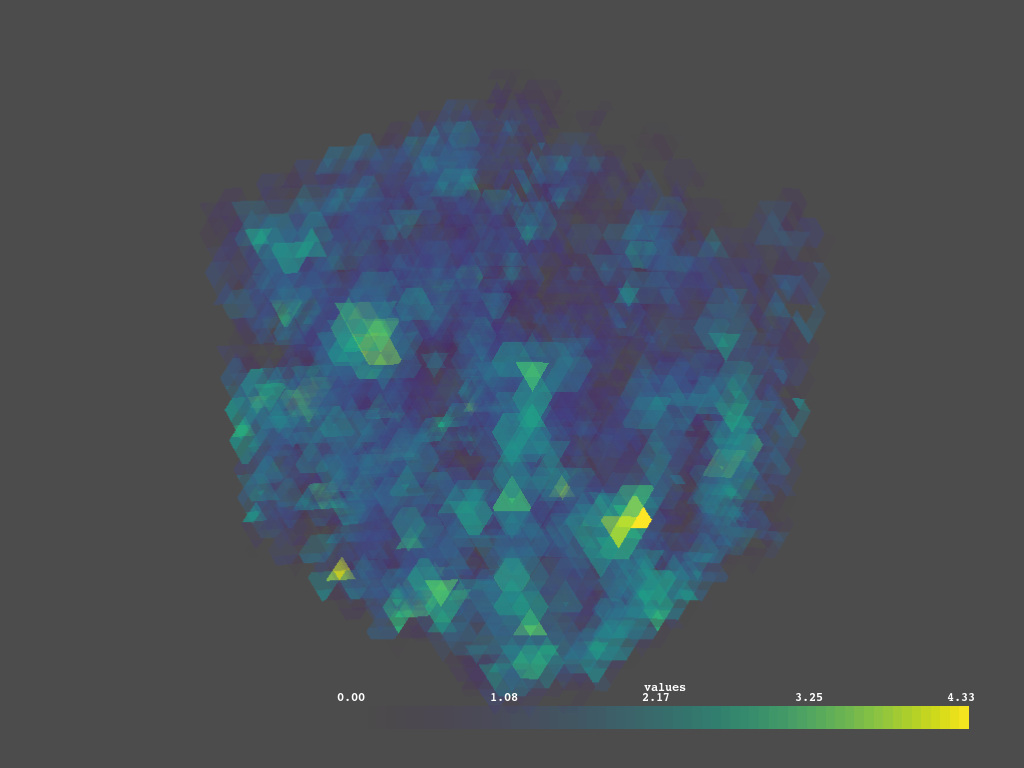

In [12]:
# estimate number of parameters
est_params = count_parameters(model)
n_layer = [11, 48, 24, 12, 6]
n_params = 0
k_size = 3
for i in range(len(n_layer)-1):
    if i < 1:
        n_params += (k_size**3*n_layer[i]+ 1 )*n_layer[i+1]
    else:
        n_params += (k_size**3*n_layer[i]+ 3 )*n_layer[i+1]



print("Number of parameters in model", n_params)
print("Number of parameteres estimated",est_params )   
if(est_params != n_params):
    print("Check ConvNet structure: kernel size, and # of Conv units in each layer")


#plot output density map
chan_id = 0 # can be 0,1,2,3
channel = output[0,chan_id,:,:,:].detach().numpy()
p = pv.Plotter(point_smoothing = True)
p.add_volume(np.abs(channel), cmap = "viridis", opacity = "linear")
p.show()

Number of parameters in model 55254
Number of parameteres estimated 55170